In [ ]:
# Import the Libararies
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return np.where(z_scores > threshold)

<Axes: >

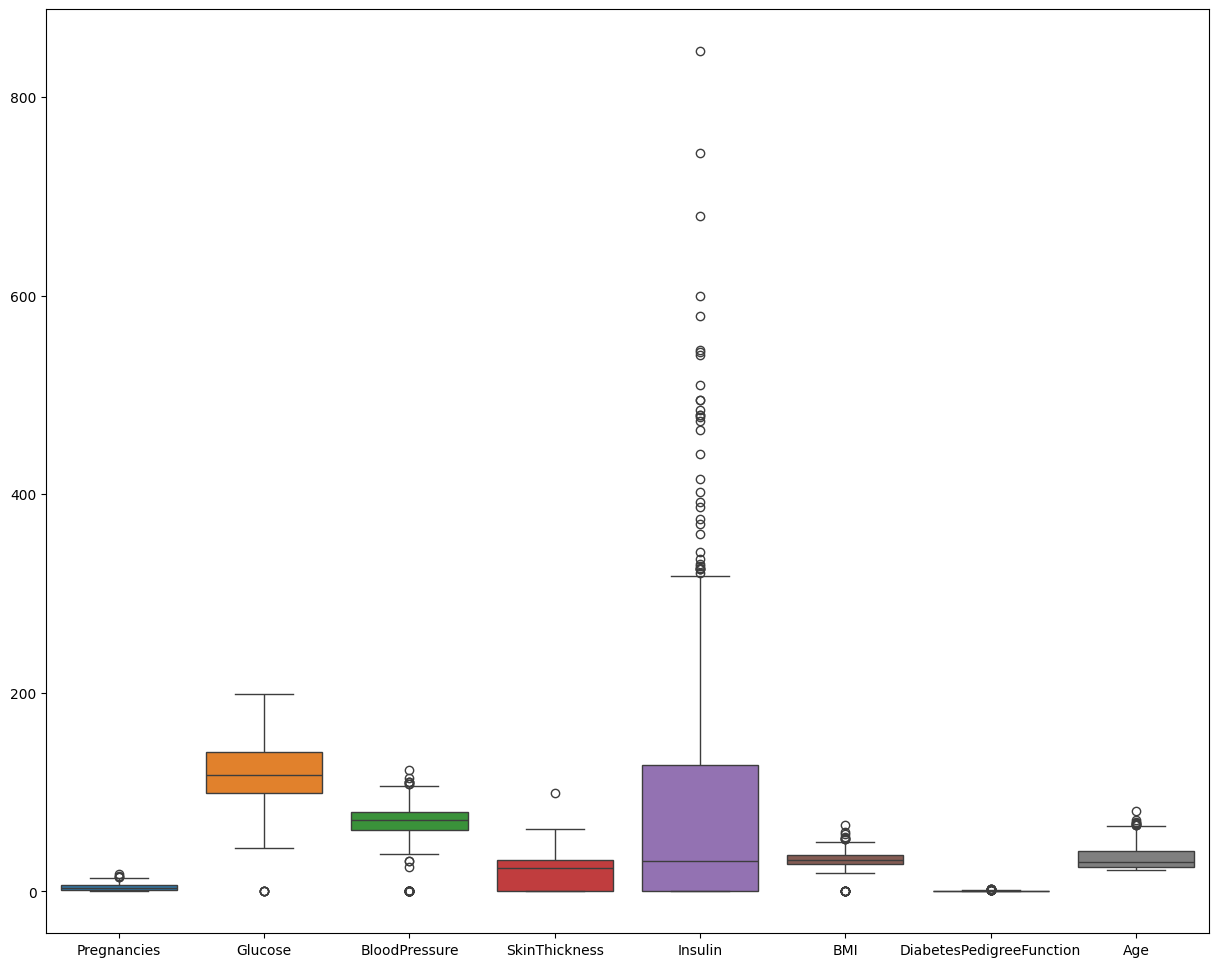

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))

sns.boxplot(data=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

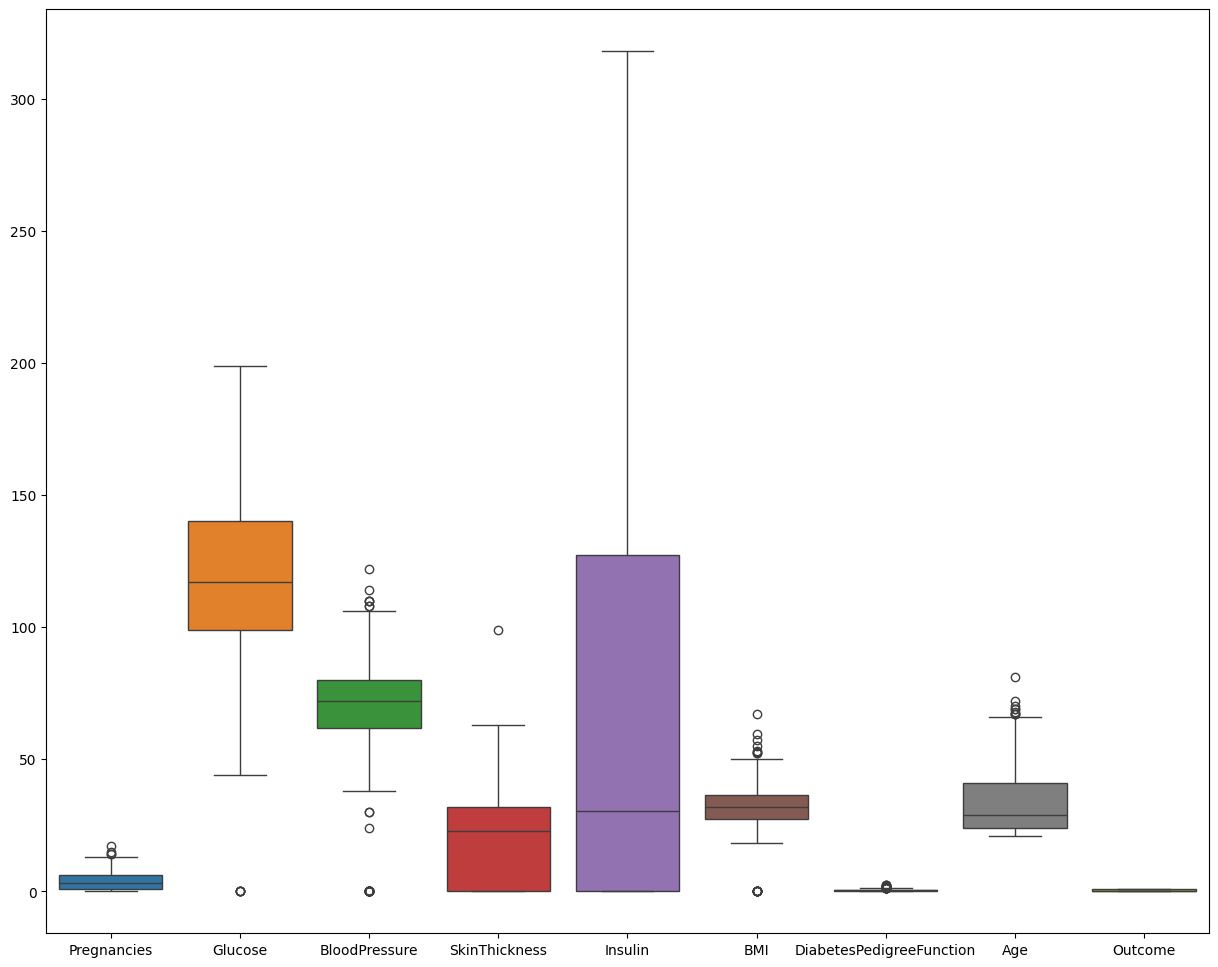

In [ ]:
Q1 =data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the bounds
data['Insulin'] = data['Insulin'].clip(lower=lower_bound, upper=upper_bound)
data['BMI'] = data['BMI'].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(15,12))

# Plot boxplots after handling outliers for 'Insulin' column
sns.boxplot(data=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']])

plt.show()

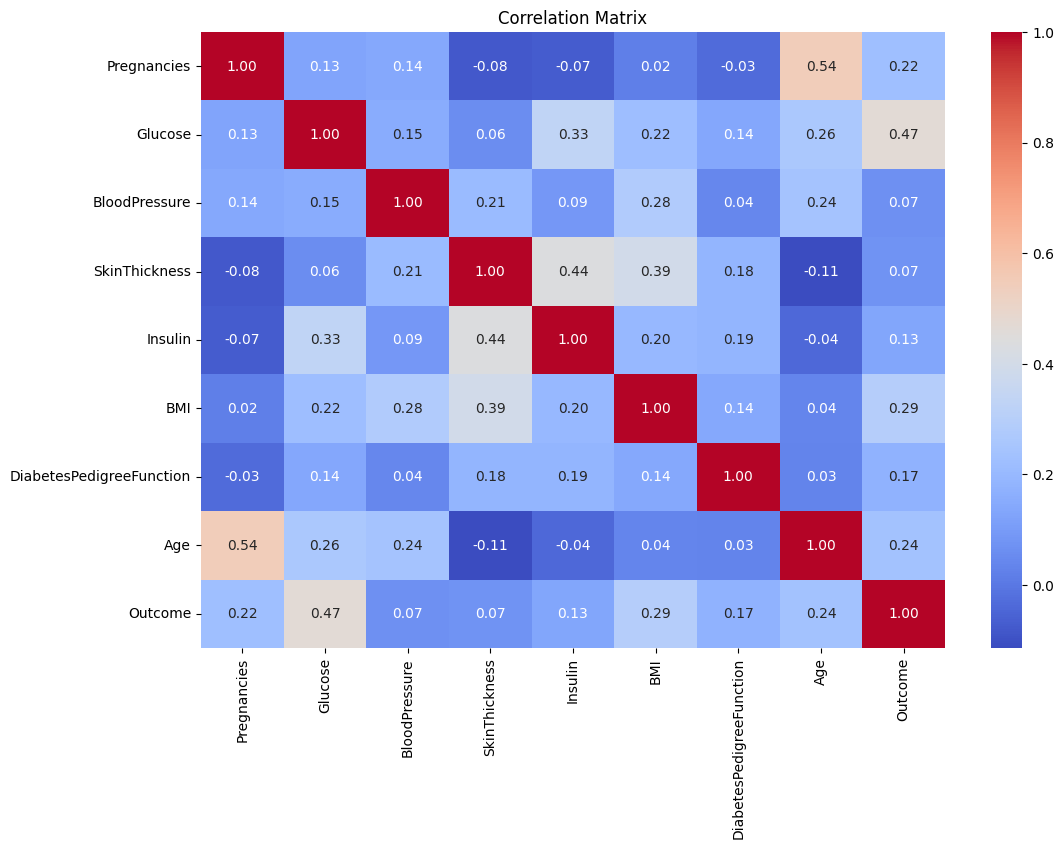

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

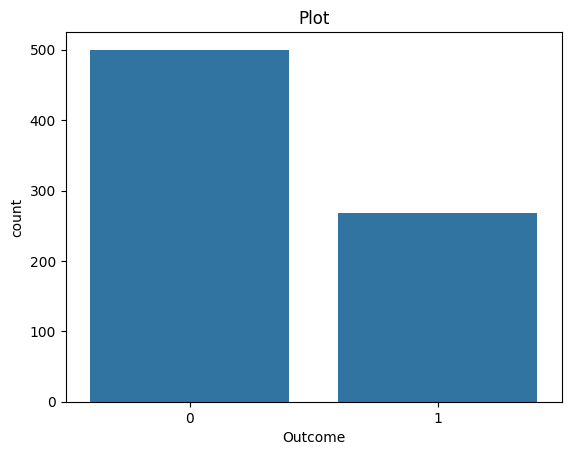

In [ ]:
sns.countplot(x='Outcome', data=data)
plt.title('Plot')
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [ ]:
x=data.drop(columns="Outcome")
y=data.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [ ]:
x_train_std

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [ ]:
!pip install livelossplot


In [ ]:
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout,Input


### SIMPLE ANN

In [ ]:
model=Sequential()

model.add(Input(shape=(8
                       ,),name="Input Layer"))



model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.4)
tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

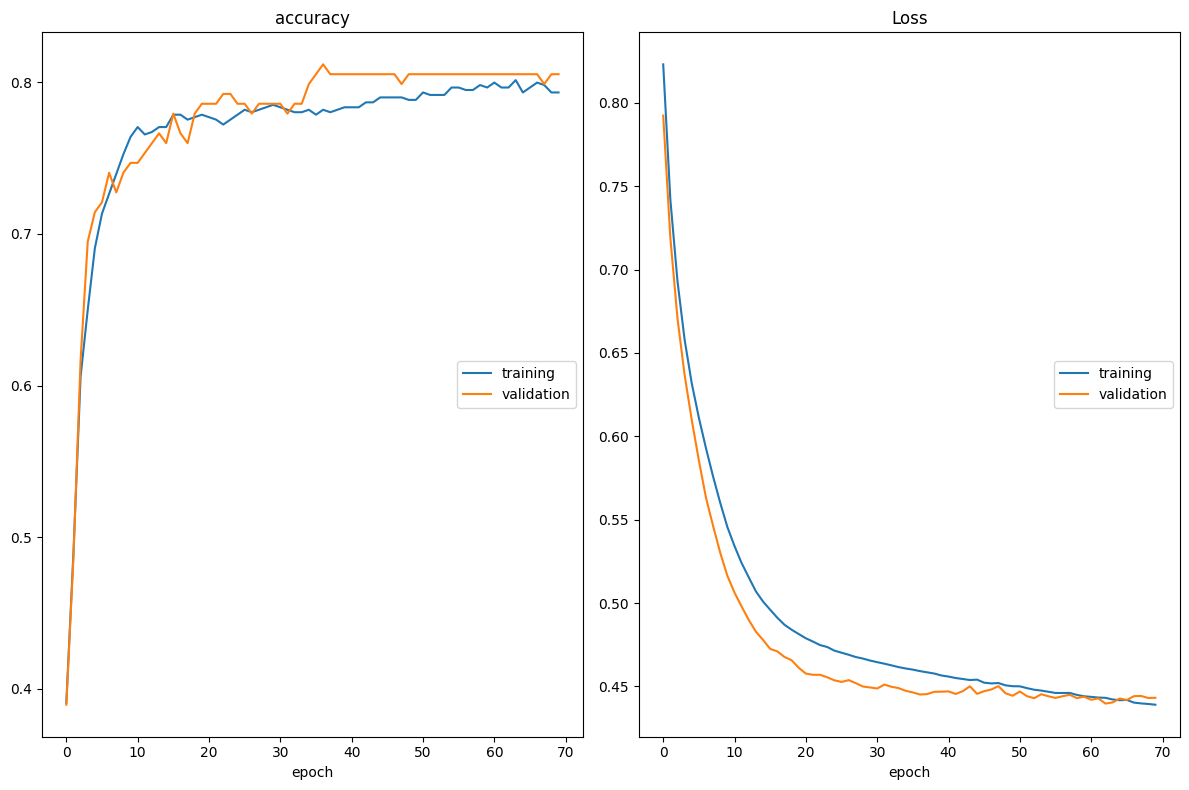

accuracy
	training         	 (min:    0.391, max:    0.801, cur:    0.793)
	validation       	 (min:    0.390, max:    0.812, cur:    0.805)
Loss
	training         	 (min:    0.439, max:    0.823, cur:    0.439)
	validation       	 (min:    0.440, max:    0.792, cur:    0.443)
20/20 [==============================] - 1s 50ms/step - loss: 0.4390 - accuracy: 0.7932 - val_loss: 0.4432 - val_accuracy: 0.8052


In [ ]:
model.fit(x_train_std,y_train,epochs=70,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

### L1 REGULARISATION

In [ ]:
model=Sequential()

model.add(Input(shape=(8
                       ,),name="Input Layer"))

model.add(Dense(8,activation='relu',kernel_regularizer=l1(l1=0.00001)))

model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

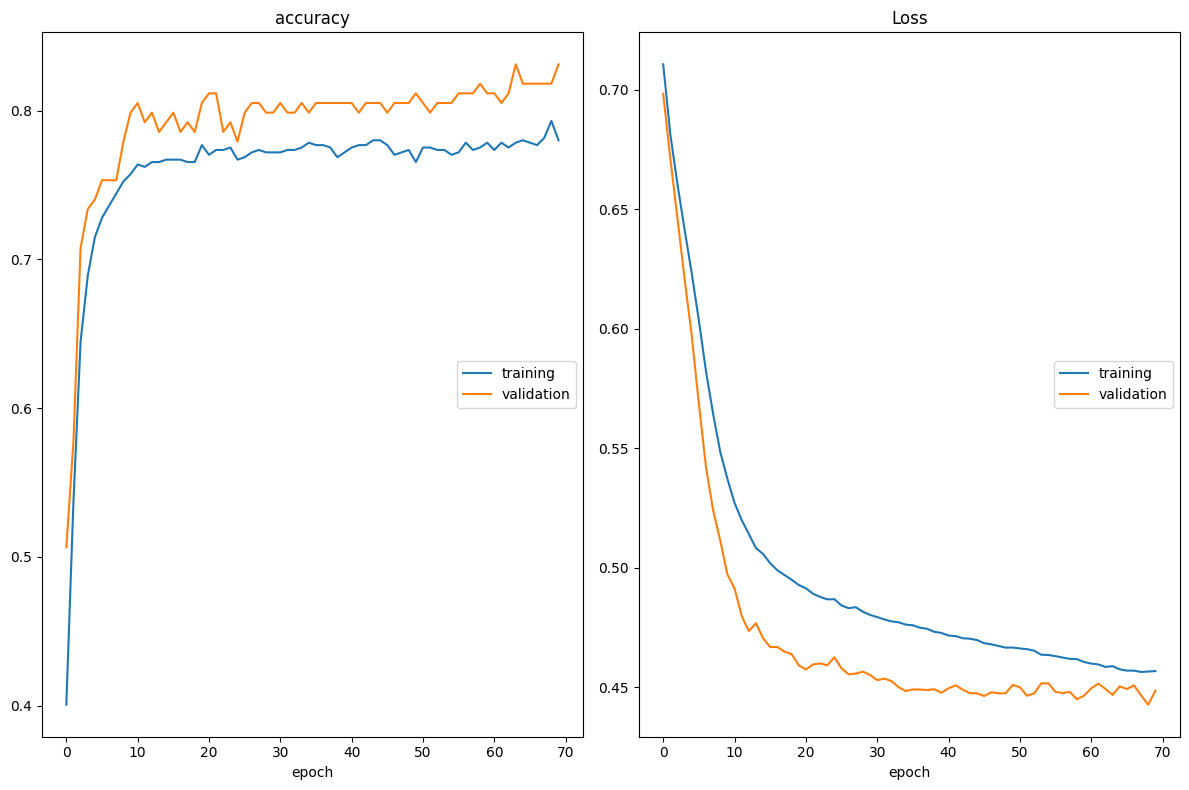

accuracy
	training         	 (min:    0.401, max:    0.793, cur:    0.780)
	validation       	 (min:    0.506, max:    0.831, cur:    0.831)
Loss
	training         	 (min:    0.456, max:    0.711, cur:    0.457)
	validation       	 (min:    0.443, max:    0.698, cur:    0.449)
20/20 [==============================] - 1s 31ms/step - loss: 0.4567 - accuracy: 0.7801 - val_loss: 0.4485 - val_accuracy: 0.8312


In [ ]:
model.fit(x_train_std,y_train,epochs=70,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

### L2 REGULARISATION

In [ ]:
model=Sequential()

model.add(Input(shape=(8
                       ,),name="Input Layer"))

model.add(Dense(8,activation='relu',kernel_regularizer=l2(l2=0.00001)))

model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

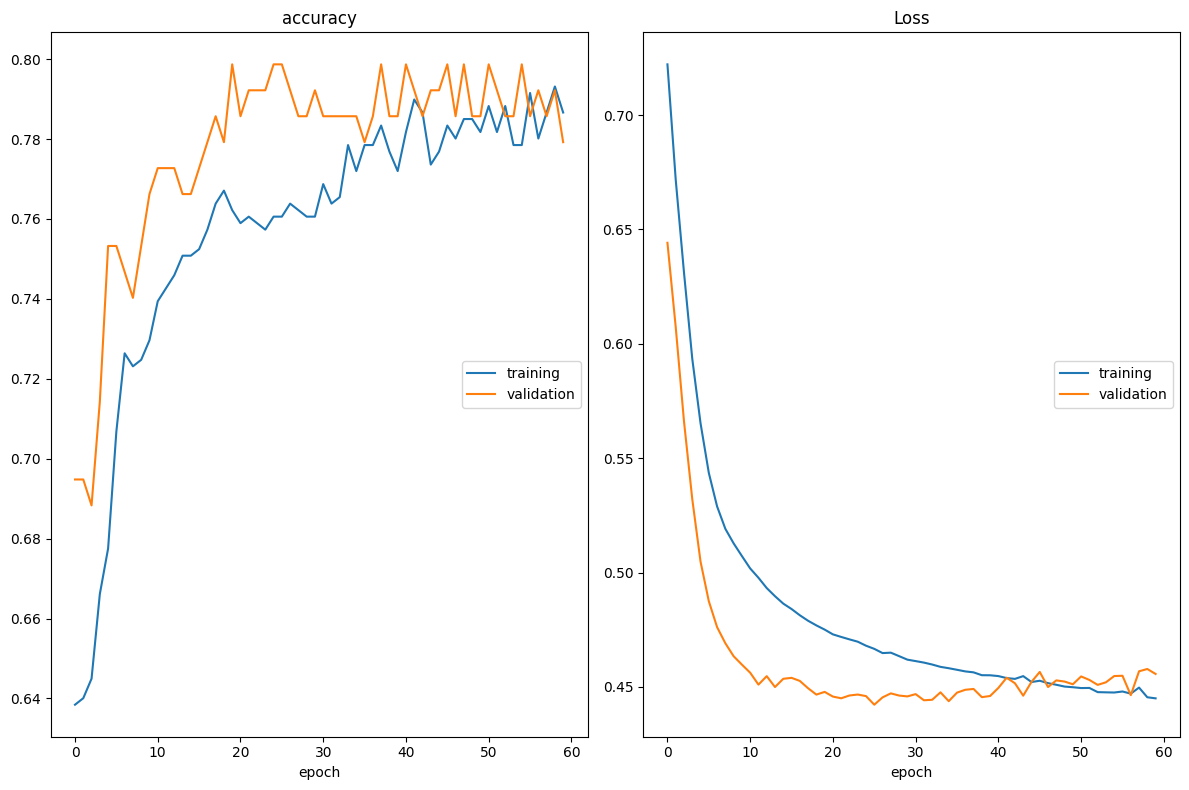

accuracy
	training         	 (min:    0.638, max:    0.793, cur:    0.787)
	validation       	 (min:    0.688, max:    0.799, cur:    0.779)
Loss
	training         	 (min:    0.445, max:    0.722, cur:    0.445)
	validation       	 (min:    0.442, max:    0.644, cur:    0.456)
20/20 [==============================] - 1s 32ms/step - loss: 0.4450 - accuracy: 0.7866 - val_loss: 0.4557 - val_accuracy: 0.7792


In [ ]:
model.fit(x_train_std,y_train,epochs=60,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

### L1+L2 REGULARISATION

In [ ]:
from tensorflow.keras import regularizers
model=Sequential()

model.add(Input(shape=(8
                       ,),name="Input Layer"))

model.add(Dense(8,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.0001,l2=0.00001)))

model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

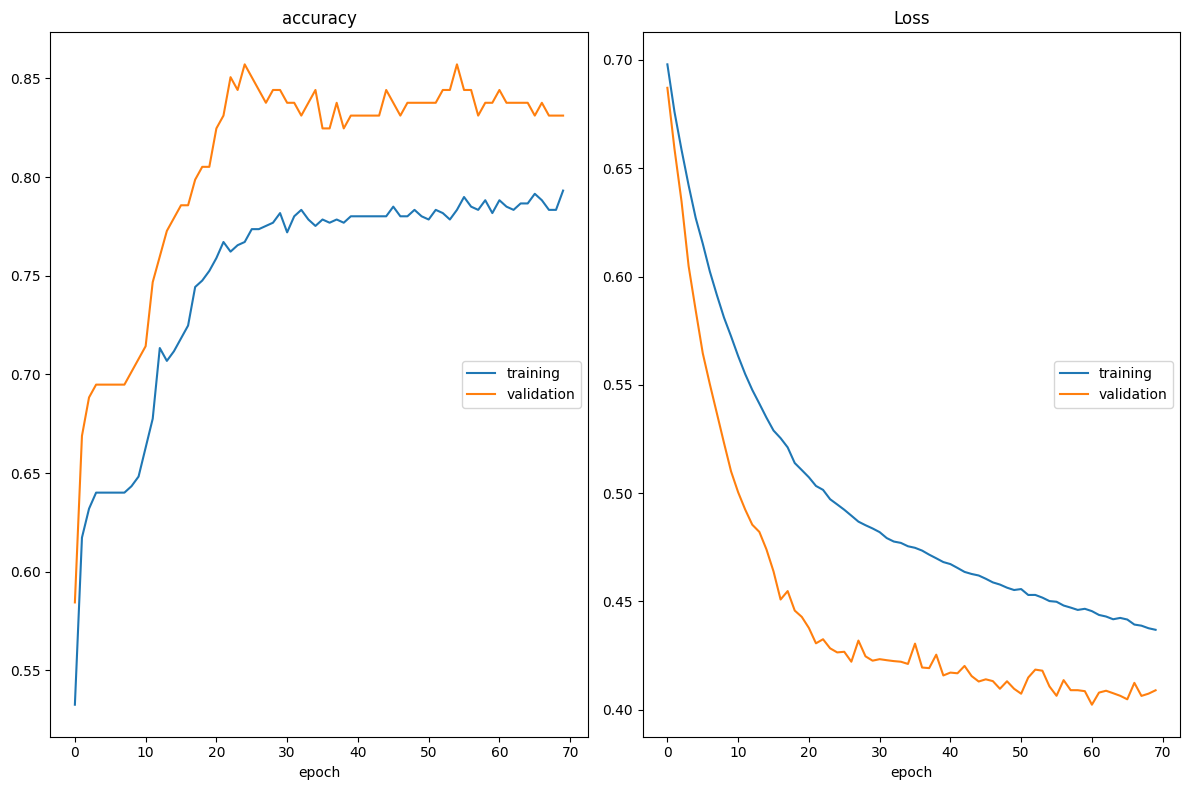

accuracy
	training         	 (min:    0.533, max:    0.793, cur:    0.793)
	validation       	 (min:    0.584, max:    0.857, cur:    0.831)
Loss
	training         	 (min:    0.437, max:    0.698, cur:    0.437)
	validation       	 (min:    0.402, max:    0.687, cur:    0.409)
20/20 [==============================] - 1s 53ms/step - loss: 0.4369 - accuracy: 0.7932 - val_loss: 0.4090 - val_accuracy: 0.8312


In [ ]:
model.fit(x_train_std,y_train,epochs=70,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

### DROPOUT REGULARISATION

In [ ]:
model=Sequential()

model.add(Input(shape=(8
                       ,),name="Input Layer"))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.50))


model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

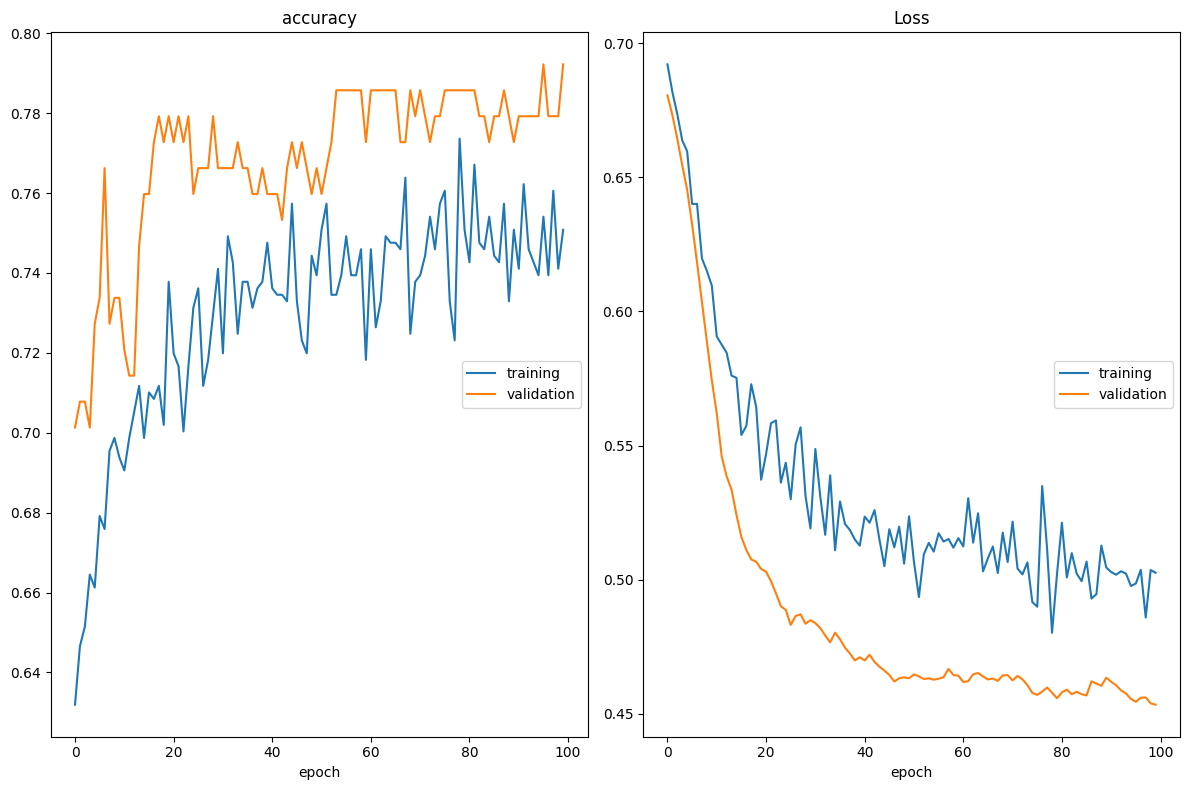

accuracy
	training         	 (min:    0.632, max:    0.774, cur:    0.751)
	validation       	 (min:    0.701, max:    0.792, cur:    0.792)
Loss
	training         	 (min:    0.480, max:    0.692, cur:    0.503)
	validation       	 (min:    0.453, max:    0.681, cur:    0.453)
20/20 [==============================] - 1s 33ms/step - loss: 0.5026 - accuracy: 0.7508 - val_loss: 0.4535 - val_accuracy: 0.7922


In [ ]:
model.fit(x_train_std,y_train,epochs=100,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])